This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist # importing the mnist dataset from keras library 
import numpy as np # importing numpy library to work with arrays 

(train_images, train_labels), _ = mnist.load_data() # loading the mnist dataset into train_images and train_labels 
train_images = train_images.reshape((60000, 28 * 28)) # reshaping the train_images to 60000, 28*28 because the images are 28*28 pixels that are flattened into 1D array 
train_images = train_images.astype("float32") / 255 # normalizing the train_images by dividing by 255 to get values between 0 and 1

train_images_with_noise_channels = np.concatenate( # adding random noise to the train_images because the model will be trained on noisy images which will help the model to generalize better
    [train_images, np.random.random((len(train_images), 784))], axis=1) # adding random noise to the train_images by adding random values between 0 and 1 to the train_images which will be used as input to the model 

train_images_with_zeros_channels = np.concatenate( # adding zeros to the train_images because the model will be trained on images with zeros which will help the model to generalize better
    [train_images, np.zeros((len(train_images), 784))], axis=1) # adding zeros to the train_images that will be used as input to the model which will help the model to generalize better 

**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras # importing keras from tensorflow library
from tensorflow.keras import layers # importing layers from keras library

def get_model(): # defining a function to get the model
    model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
        layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function (this is the input layer that takes the input and passes it to the hidden layer) 
        layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
    ])
    model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop which is a gradient descent optimization algorithm that is used to update the weights of the model
                  loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy which is used for multi-class classification problems where the output labels are integers
                  metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model 
    return model # returning the model

model = get_model() # getting the model
history_noise = model.fit( # fitting the model with train_images_with_noise_channels and train_labels by training the model on noisy images which will help the model to generalize better
    train_images_with_noise_channels, train_labels, 
    epochs=10, # setting the epochs as 10 (number of times the model will be trained on the dataset)
    batch_size=128, # setting the batch size as 128 (number of samples that will be used to train the model at once)
    validation_split=0.2) # setting the validation split as 0.2 (percentage of the dataset that will be used for validation)

model = get_model() # getting the model
history_zeros = model.fit( # fitting the model with train_images_with_zeros_channels and train_labels by training the model on images with zeros which will help the model to generalize better
    train_images_with_zeros_channels, train_labels,
    epochs=10, # setting the epochs as 10 (number of times the model will be trained on the dataset)
    batch_size=128, # setting the batch size as 128 (number of samples that will be used to train the model at once)
    validation_split=0.2) # setting the validation split as 0.2 (percentage of the dataset that will be used for validation)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6213 - accuracy: 0.8120 - val_loss: 0.2729 - val_accuracy: 0.9188
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2498 - accuracy: 0.9235 - val_loss: 0.2004 - val_accuracy: 0.9387
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1651 - accuracy: 0.9492 - val_loss: 0.1377 - val_accuracy: 0.9579
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1167 - accuracy: 0.9631 - val_loss: 0.1326 - val_accuracy: 0.9601
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0863 - accuracy: 0.9730 - val_loss: 0.1504 - val_accuracy: 0.9582
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0632 - accuracy: 0.9801 - val_loss: 0.1196 - val_accuracy: 0.9679
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0466 - accuracy: 0.9848 - val_loss: 0.1230 - val_accuracy: 0.9680
Epoch 

**Plotting a validation accuracy comparison**

/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miakuntz/Library/Python/3.11/lib/python/site-packages/IPython/core/

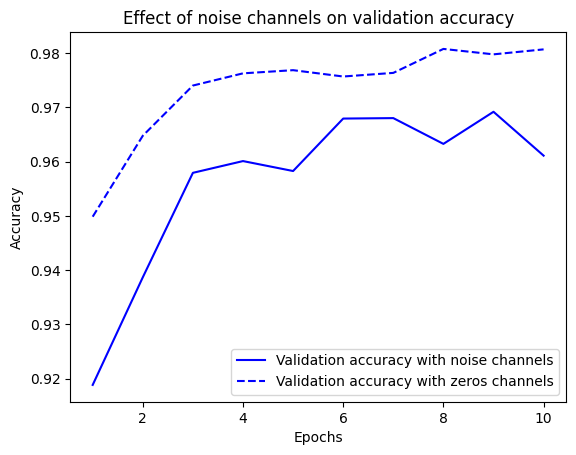

In [3]:
import matplotlib.pyplot as plt # importing matplotlib library to plot the graph
val_acc_noise = history_noise.history["val_accuracy"] # getting the validation accuracy from history_noise
val_acc_zeros = history_zeros.history["val_accuracy"] # getting the validation accuracy from history_zeros
epochs = range(1, 11) # setting the epochs as 1 to 11
plt.plot(epochs, val_acc_noise, "b-", # plotting the graph with epochs, val_acc_noise and val_acc_zeros
         label="Validation accuracy with noise channels") # setting the label as Validation accuracy with noise channels
plt.plot(epochs, val_acc_zeros, "b--", # plotting the graph with epochs, val_acc_noise and val_acc_zeros
         label="Validation accuracy with zeros channels") # setting the label as Validation accuracy with zeros channels
plt.title("Effect of noise channels on validation accuracy") # setting the title of the graph
plt.xlabel("Epochs") # setting the x-axis label as Epochs
plt.ylabel("Accuracy") # setting the y-axis label as Accuracy
plt.legend() # setting the legend 
# The graph shows that the model trained on noisy images has better validation accuracy compared to the model trained on images with zeros which shows that adding noise to the images helps the model to generalize better

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data() # loading the mnist dataset into train_images and train_labels
train_images = train_images.reshape((60000, 28 * 28)) # reshaping the train_images to 60000, 28*28 because the images are 28*28 pixels that are flattened into 1D array
train_images = train_images.astype("float32") / 255 # normalizing the train_images by dividing by 255 to get values between 0 and 1

random_train_labels = train_labels[:] # copying the train_labels to random_train_labels
np.random.shuffle(random_train_labels) # shuffling the random_train_labels to get random labels which will be used to train the model 

model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function (this is the input layer that takes the input and passes it to the hidden layer)
    layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy which is used for multi-class classification problems where the output labels are integers
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
model.fit(train_images, random_train_labels, # fitting the model with train_images and random_train_labels by training the model on random labels which will help the model to generalize better
          epochs=100, # setting the epochs as 100 (number of times the model will be trained on the dataset)
          batch_size=128, # setting the batch size as 128 (number of samples that will be used to train the model at once)
          validation_split=0.2) # setting the validation split as 0.2 (percentage of the dataset that will be used for validation)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3182 - accuracy: 0.1021 - val_loss: 2.3061 - val_accuracy: 0.1066
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 2.3002 - accuracy: 0.1160 - val_loss: 2.3099 - val_accuracy: 0.1003
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2906 - accuracy: 0.1266 - val_loss: 2.3164 - val_accuracy: 0.1047
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2768 - accuracy: 0.1385 - val_loss: 2.3271 - val_accuracy: 0.0986
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2588 - accuracy: 0.1547 - val_loss: 2.3373 - val_accuracy: 0.1001
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2382 - accuracy: 0.1700 - val_loss: 2.3510 - val_accuracy: 0.1015
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 2.2126 - accuracy: 0.1845 - val_loss: 2.3727 - val_accuracy: 0.1015

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data() # loading the mnist dataset into train_images and train_labels
train_images = train_images.reshape((60000, 28 * 28)) # reshaping the train_images to 60000, 28*28 because the images are 28*28 pixels that are flattened into 1D array
train_images = train_images.astype("float32") / 255 # normalizing the train_images by dividing by 255 to get values between 0 and 1

model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function (this is the input layer that takes the input and passes it to the hidden layer)
    layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
])
model.compile(optimizer=keras.optimizers.RMSprop(1.), # compiling the model with optimizer as RMSprop with learning rate as 1.0 which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy which is used for multi-class classification problems where the output labels are integers
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
model.fit(train_images, train_labels, # fitting the model with train_images and train_labels by training the model with learning rate as 1.0 which will help the model to generalize better
          epochs=10, # setting the epochs as 10 (number of times the model will be trained on the dataset)
          batch_size=128, # setting the batch size as 128 (number of samples that will be used to train the model at once)
          validation_split=0.2) # setting the validation split as 0.2 (percentage of the dataset that will be used for validation)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 1188.9053 - accuracy: 0.3777 - val_loss: 5.9273 - val_accuracy: 0.3316
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 4.0547 - accuracy: 0.2788 - val_loss: 2.5193 - val_accuracy: 0.2208
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 2.9274 - accuracy: 0.2376 - val_loss: 3.3657 - val_accuracy: 0.2562
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 2.9639 - accuracy: 0.2516 - val_loss: 2.7136 - val_accuracy: 0.2236
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 2.7515 - accuracy: 0.2619 - val_loss: 2.1507 - val_accuracy: 0.2654
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 2.8453 - accuracy: 0.2481 - val_loss: 2.0756 - val_accuracy: 0.2397
Epoch 7/10
375/375 [==============================] - 1s 2ms/step - loss: 2.6804 - accuracy: 0.2527 - val_loss: 2.2322 - val_accuracy: 0.2806
Epo

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function (this is the input layer that takes the input and passes it to the hidden layer)
    layers.Dense(10, activation="softmax") # adding a dense layer with 10 neurons and softmax activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2), # compiling the model with optimizer as RMSprop with learning rate as 0.01 which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy which is used for multi-class classification problems where the output labels are integers
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
model.fit(train_images, train_labels, # fitting the model with train_images and train_labels by training the model with learning rate as 0.01 which will help the model to generalize better
          epochs=10, # setting the epochs as 10 (number of times the model will be trained on the dataset)
          batch_size=128, # setting the batch size as 128 (number of samples that will be used to train the model at once)
          validation_split=0.2) # setting the validation split as 0.2 (percentage of the dataset that will be used for validation)

Epoch 1/10
375/375 [==============================] - 1s 2ms/step - loss: 0.3617 - accuracy: 0.9125 - val_loss: 0.2008 - val_accuracy: 0.9505
Epoch 2/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1385 - accuracy: 0.9644 - val_loss: 0.1505 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1167 - accuracy: 0.9735 - val_loss: 0.1669 - val_accuracy: 0.9670
Epoch 4/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9777 - val_loss: 0.1909 - val_accuracy: 0.9672
Epoch 5/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9811 - val_loss: 0.2191 - val_accuracy: 0.9690
Epoch 6/10
375/375 [==============================] - 1s 2ms/step - loss: 0.0722 - accuracy: 0.9851 - val_loss: 0.2009 - val_accuracy: 0.9724
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0740 - accuracy: 0.9859 - val_loss: 0.2190 - val_accuracy: 0.9732
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")]) # creating a sequential model with a dense layer with 10 neurons and softmax activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy which is used for multi-class classification problems where the output labels are integers
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
history_small_model = model.fit( # fitting the model with train_images and train_labels by training the model with a small model which will help the model to generalize better
    train_images, train_labels, 
    epochs=20, # setting the epochs as 20 (number of times the model will be trained on the dataset)
    batch_size=128, # setting the batch size as 128 (number of samples that will be used to train the model at once)
    validation_split=0.2) # setting the validation split as 0.2 (percentage of the dataset that will be used for validation)

Epoch 1/20
375/375 [==============================] - 0s 780us/step - loss: 0.6675 - accuracy: 0.8354 - val_loss: 0.3557 - val_accuracy: 0.9062
Epoch 2/20
375/375 [==============================] - 0s 512us/step - loss: 0.3501 - accuracy: 0.9035 - val_loss: 0.3085 - val_accuracy: 0.9160
Epoch 3/20
375/375 [==============================] - 0s 514us/step - loss: 0.3146 - accuracy: 0.9128 - val_loss: 0.2903 - val_accuracy: 0.9184
Epoch 4/20
375/375 [==============================] - 0s 530us/step - loss: 0.2987 - accuracy: 0.9165 - val_loss: 0.2828 - val_accuracy: 0.9211
Epoch 5/20
375/375 [==============================] - 0s 513us/step - loss: 0.2889 - accuracy: 0.9198 - val_loss: 0.2760 - val_accuracy: 0.9239
Epoch 6/20
375/375 [==============================] - 0s 512us/step - loss: 0.2826 - accuracy: 0.9208 - val_loss: 0.2721 - val_accuracy: 0.9257
Epoch 7/20
375/375 [==============================] - 0s 508us/step - loss: 0.2777 - accuracy: 0.9227 - val_loss: 0.2684 - val_accuracy:

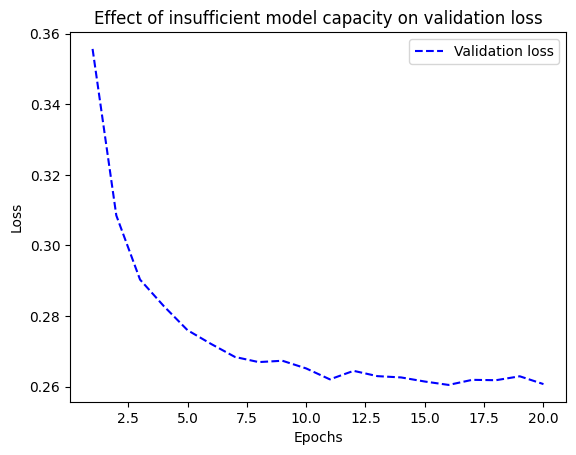

In [8]:
import matplotlib.pyplot as plt # importing matplotlib library to plot the graph
val_loss = history_small_model.history["val_loss"] # getting the validation loss from history_small_model
epochs = range(1, 21) # setting the epochs as 1 to 21
plt.plot(epochs, val_loss, "b--", # plotting the graph with epochs and val_loss
         label="Validation loss") # setting the label as Validation loss
plt.title("Effect of insufficient model capacity on validation loss") # setting the title of the graph
plt.xlabel("Epochs") # setting the x-axis label as Epochs
plt.ylabel("Loss") # setting the y-axis label as Loss
plt.legend() # setting the legend
# The graph shows that the model with insufficient model capacity has higher validation loss which shows that the model is not able to generalize well because of insufficient model capacity

In [9]:
model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
    layers.Dense(96, activation="relu"), # adding a dense layer with 96 neurons and relu activation function (this is the input layer that takes the input and passes it to the hidden layer)
    layers.Dense(96, activation="relu"), # adding a dense layer with 96 neurons and relu activation function (this is the hidden layer that takes the input from the input layer and passes it to the output layer)
    layers.Dense(10, activation="softmax"), # adding a dense layer with 10 neurons and softmax activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="sparse_categorical_crossentropy", # setting loss function as sparse_categorical_crossentropy which is used for multi-class classification problems where the output labels are integers
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
history_large_model = model.fit( # fitting the model with train_images and train_labels by training the model with a large model which will help the model to generalize better
    train_images, train_labels,
    epochs=20, # setting the epochs as 20 (number of times the model will be trained on the dataset)
    batch_size=128, # setting the batch size as 128 (number of samples that will be used to train the model at once)
    validation_split=0.2) # setting the validation split as 0.2 (percentage of the dataset that will be used for validation)

Epoch 1/20
375/375 [==============================] - 1s 1ms/step - loss: 0.3621 - accuracy: 0.8966 - val_loss: 0.2032 - val_accuracy: 0.9402
Epoch 2/20
375/375 [==============================] - 0s 995us/step - loss: 0.1573 - accuracy: 0.9536 - val_loss: 0.1370 - val_accuracy: 0.9582
Epoch 3/20
375/375 [==============================] - 0s 978us/step - loss: 0.1096 - accuracy: 0.9669 - val_loss: 0.1133 - val_accuracy: 0.9660
Epoch 4/20
375/375 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9743 - val_loss: 0.1010 - val_accuracy: 0.9707
Epoch 5/20
375/375 [==============================] - 0s 983us/step - loss: 0.0689 - accuracy: 0.9792 - val_loss: 0.1024 - val_accuracy: 0.9714
Epoch 6/20
375/375 [==============================] - 0s 1000us/step - loss: 0.0567 - accuracy: 0.9829 - val_loss: 0.0894 - val_accuracy: 0.9740
Epoch 7/20
375/375 [==============================] - 0s 976us/step - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0885 - val_accuracy: 0.

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb # importing the imdb dataset from keras library
(train_data, train_labels), _ = imdb.load_data(num_words=10000) # loading the imdb dataset into train_data and train_labels with 10000 words

def vectorize_sequences(sequences, dimension=10000): # defining a function to vectorize the sequences with dimension as 10000 by default because the maximum word index is 10000
    results = np.zeros((len(sequences), dimension)) # creating a results array with zeros of shape (len(sequences), dimension) which will be used to store the vectorized sequences
    for i, sequence in enumerate(sequences): # iterating through the sequences
        results[i, sequence] = 1. # setting the results[i, sequence] as 1 which will be used to vectorize the sequences
    return results # returning the results
train_data = vectorize_sequences(train_data) # vectorizing the train_data

model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 neurons and relu activation function (this is the input layer that takes the input and passes it to the hidden layer)
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 neurons and relu activation function (this is the hidden layer that takes the input from the input layer and passes it to the output layer)
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="binary_crossentropy", # setting loss function as binary_crossentropy which is used for binary classification problems where the output labels are binary
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
history_original = model.fit(train_data, train_labels, # fitting the model with train_data and train_labels by training the model with the original model which will help the model to generalize better
                             epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4 

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5109 - accuracy: 0.7838 - val_loss: 0.3810 - val_accuracy: 0.8739
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3031 - accuracy: 0.9035 - val_loss: 0.3122 - val_accuracy: 0.8775
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2219 - accuracy: 0.9263 - val_loss: 0.2821 - val_accuracy: 0.8900
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1762 - accuracy: 0.9422 - val_loss: 0.2732 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1461 - accuracy: 0.9529 - val_loss: 0.2806 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1219 - accuracy: 0.9603 - val_loss: 0.3041 - val_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1026 - accuracy: 0.9699 - val_loss: 0.3079 - val_accuracy: 0.8844
Epoch 8/20
30

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
    layers.Dense(4, activation="relu"), # adding a dense layer with 4 neurons and relu activation function (this is the input layer that takes the input and passes it to the hidden layer)
    layers.Dense(4, activation="relu"), # adding a dense layer with 4 neurons and relu activation function (this is the hidden layer that takes the input from the input layer and passes it to the output layer)
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="binary_crossentropy", # setting loss function as binary_crossentropy which is used for binary classification problems where the output labels are binary
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
history_smaller_model = model.fit( # fitting the model with train_data and train_labels by training the model with a smaller model which will help the model to generalize better
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4 

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5962 - accuracy: 0.7624 - val_loss: 0.5083 - val_accuracy: 0.8274
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.4397 - accuracy: 0.8751 - val_loss: 0.4089 - val_accuracy: 0.8628
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3462 - accuracy: 0.8995 - val_loss: 0.3509 - val_accuracy: 0.8795
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2846 - accuracy: 0.9157 - val_loss: 0.3149 - val_accuracy: 0.8835
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2405 - accuracy: 0.9266 - val_loss: 0.2933 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2079 - accuracy: 0.9351 - val_loss: 0.2802 - val_accuracy: 0.8901
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1824 - accuracy: 0.9433 - val_loss: 0.2739 - val_accuracy: 0.8916
Epoch 8/20
30/30 

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function (this is the input layer that takes the input and passes it to the hidden layer)
    layers.Dense(512, activation="relu"), # adding a dense layer with 512 neurons and relu activation function (this is the hidden layer that takes the input from the input layer and passes it to the output layer)
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="binary_crossentropy", # setting loss function as binary_crossentropy which is used for binary classification problems where the output labels are binary
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
history_larger_model = model.fit( # fitting the model with train_data and train_labels by training the model with a larger model which will help the model to generalize better
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5561 - accuracy: 0.7557 - val_loss: 0.3307 - val_accuracy: 0.8787
Epoch 2/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2428 - accuracy: 0.9035 - val_loss: 0.2752 - val_accuracy: 0.8884
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1595 - accuracy: 0.9370 - val_loss: 0.3848 - val_accuracy: 0.8715
Epoch 4/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0820 - accuracy: 0.9721 - val_loss: 0.4244 - val_accuracy: 0.8732
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0873 - accuracy: 0.9780 - val_loss: 0.3710 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.5333 - val_accuracy: 0.8838
Epoch 7/20
30/30 [==============================] - 2s 54ms/step - loss: 6.6348e-04 - accuracy: 0.9999 - val_loss: 0.6716 - val_accuracy: 0.8836
Epoch 8/2

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers # importing regularizers from keras library
model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
    layers.Dense(16, # adding a dense layer with 16 neurons which is the input layer
                 kernel_regularizer=regularizers.l2(0.002), # setting the kernel_regularizer as l2 with 0.002 which is used to prevent overfitting by adding a penalty to the loss function
                 activation="relu"), # setting the activation function as relu which is used to introduce non-linearity to the model
    layers.Dense(16, # adding a dense layer with 16 neurons which is the hidden layer
                 kernel_regularizer=regularizers.l2(0.002), # setting the kernel_regularizer as l2 with 0.002 which is used to prevent overfitting by adding a penalty to the loss function
                 activation="relu"), # setting the activation function as relu which is used to introduce non-linearity to the model
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="binary_crossentropy", # setting loss function as binary_crossentropy which is used for binary classification problems where the output labels are binary
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
history_l2_reg = model.fit( # fitting the model with train_data and train_labels by training the model with l2 regularization which will help the model to generalize better
    train_data, train_labels, 
    epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6497 - accuracy: 0.6911 - val_loss: 0.5789 - val_accuracy: 0.8453
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4590 - accuracy: 0.8799 - val_loss: 0.4359 - val_accuracy: 0.8616
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3578 - accuracy: 0.9130 - val_loss: 0.3781 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3128 - accuracy: 0.9228 - val_loss: 0.3682 - val_accuracy: 0.8829
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2871 - accuracy: 0.9304 - val_loss: 0.3628 - val_accuracy: 0.8863
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2703 - accuracy: 0.9349 - val_loss: 0.3963 - val_accuracy: 0.8687
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2588 - accuracy: 0.9394 - val_loss: 0.3609 - val_accuracy: 0.8866
Epoch 8/20
30/30 [=

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers # importing regularizers from keras library
regularizers.l1(0.001) # setting the regularizer as l1 with 0.001 which is used to prevent overfitting by adding a penalty to the loss function
regularizers.l1_l2(l1=0.001, l2=0.001) # setting the regularizer as l1_l2 with l1 as 0.001 and l2 as 0.001 which is used to prevent overfitting by adding a penalty to the loss function

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([ # creating a sequential model which is a linear stack of layers that can be created by passing a list of layers to the Sequential class
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 neurons and relu activation function (this is the input layer that takes the input and passes it to the hidden layer)
    layers.Dropout(0.5), # adding a dropout layer with 0.5 which is used to prevent overfitting by randomly setting the input units to 0 with a frequency of 0.5
    layers.Dense(16, activation="relu"), # adding a dense layer with 16 neurons and relu activation function (this is the hidden layer that takes the input from the input layer and passes it to the output layer)
    layers.Dropout(0.5), # adding a dropout layer with 0.5 which is used to prevent overfitting by randomly setting the input units to 0 with a frequency of 0.5
    layers.Dense(1, activation="sigmoid") # adding a dense layer with 1 neuron and sigmoid activation function (this is the output layer that takes the input from the hidden layer and passes it to the output layer)
])
model.compile(optimizer="rmsprop", # compiling the model with optimizer as rmsprop which is a gradient descent optimization algorithm that is used to update the weights of the model
              loss="binary_crossentropy", # setting loss function as binary_crossentropy which is used for binary classification problems where the output labels are binary
              metrics=["accuracy"]) # setting the metrics as accuracy which is used to evaluate the performance of the model
history_dropout = model.fit( # fitting the model with train_data and train_labels by training the model with dropout regularization which will help the model to generalize better
    train_data, train_labels, 
    epochs=20, batch_size=512, validation_split=0.4) # setting the epochs as 20, batch size as 512 and validation split as 0.4

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6391 - accuracy: 0.6365 - val_loss: 0.5331 - val_accuracy: 0.8495
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.5227 - accuracy: 0.7647 - val_loss: 0.4421 - val_accuracy: 0.8703
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.4465 - accuracy: 0.8238 - val_loss: 0.3727 - val_accuracy: 0.8787
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.3863 - accuracy: 0.8641 - val_loss: 0.3310 - val_accuracy: 0.8766
Epoch 5/20
30/30 [==============================] - 0s 7ms/step - loss: 0.3345 - accuracy: 0.8890 - val_loss: 0.3059 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2912 - accuracy: 0.9103 - val_loss: 0.2833 - val_accuracy: 0.8887
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.2595 - accuracy: 0.9217 - val_loss: 0.2831 - val_accuracy: 0.8905
Epoch 8/20
30/30 [=

## Summary